## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [ ]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [5]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    img_size = (img.shape[1],img.shape[0])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         plt.imshow(img)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)
print(ret)

1.0298149716172809


Text(0.5,1,'Undistorted Image')

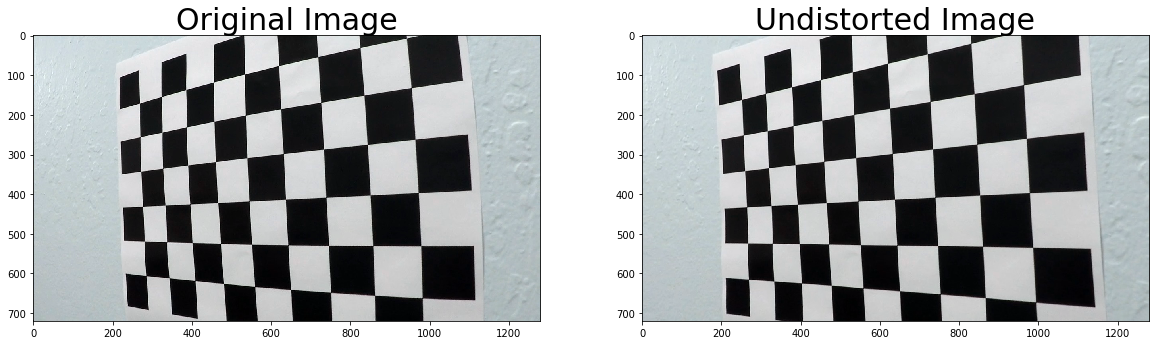

In [15]:
# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration4.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
# dist_pickle = {}
# dist_pickle["mtx"] = mtx
# dist_pickle["dist"] = dist
# pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [7]:
print(dist)

[[-0.24688507 -0.02373155 -0.00109831  0.00035107 -0.00259868]]


In [8]:
print(rvecs)

[array([[ 0.50881049],
       [-0.21913637],
       [ 0.02925031]]), array([[0.0340257 ],
       [0.45851293],
       [0.00531513]]), array([[0.03491565],
       [0.65175488],
       [0.00975186]]), array([[-0.33009432],
       [ 0.66083096],
       [-0.4156368 ]]), array([[ 0.05512178],
       [-0.51768678],
       [-0.00421075]]), array([[-0.02341926],
       [-0.48743959],
       [ 0.02025372]]), array([[ 0.03795605],
       [-0.46391041],
       [-0.05634147]]), array([[ 0.21392273],
       [-0.06381126],
       [ 0.01147972]]), array([[ 0.18014885],
       [-0.05109107],
       [-0.00119253]]), array([[0.08576683],
       [0.38442538],
       [0.05432059]]), array([[ 0.63302921],
       [-0.04811505],
       [ 0.01736486]]), array([[-0.02312669],
       [ 0.38311823],
       [-0.00428508]]), array([[-0.44950668],
       [-0.06457206],
       [-0.01889957]]), array([[ 0.01747813],
       [ 0.02494177],
       [-0.00556532]]), array([[0.01885091],
       [0.63881804],
       [0.0086

In [9]:
print(tvecs)

[array([[-2.07544017],
       [-0.72151849],
       [19.60896921]]), array([[-16.94334105],
       [ -3.47374355],
       [ 32.02983991]]), array([[-0.17057349],
       [-3.46743042],
       [21.90002083]]), array([[-6.00671883],
       [-1.55709903],
       [26.68804591]]), array([[ 5.41005519],
       [-4.44467908],
       [20.80668921]]), array([[ 4.51992359],
       [-1.46318399],
       [19.99665736]]), array([[ 4.92731857],
       [-5.04988605],
       [19.81577995]]), array([[-3.94711981],
       [-1.31227401],
       [17.08058725]]), array([[-3.61133412],
       [-4.12470529],
       [17.84109659]]), array([[-12.98681377],
       [ -5.57791313],
       [ 23.73281514]]), array([[-3.81142048],
       [-1.60024679],
       [ 7.97502198]]), array([[-13.39243764],
       [ -0.46708156],
       [ 24.5305621 ]]), array([[-4.3805372 ],
       [-3.05121989],
       [10.72925732]]), array([[-4.91151337],
       [-3.84980026],
       [30.51605128]]), array([[-9.57780866],
       [-3.26905

In [12]:
print(objp.shape)

(54, 3)


In [19]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
# print(objp)

In [20]:
?glob.glob

Signature: glob.glob(pathname, *, recursive=False)
Docstring:
Return a list of paths matching a pathname pattern.

The pattern may contain simple shell-style wildcards a la
fnmatch. However, unlike fnmatch, filenames starting with a
dot are special cases that are not matched by '*' and '?'
patterns.

If recursive is true, the pattern '**' will match any files and
zero or more directories and subdirectories.
File:      c:\programdata\anaconda3\lib\glob.py
Type:      function
